# Three-Point Vertex Function at Finite Temperature

## Imports and Definitions

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

import finite_temperature as ft
from wick_rotation import to_minkowski
import zero_temperature as zt

In [2]:
eps = sp.symbols("eps")

In [3]:
def finite_part(expr):
    return expr.subs(eps, 0)

## Vertex Function at Zero Temperature

In [4]:
masses = 2, 2, 2

In [12]:
p1_space = [0, 0, 0]
p2_space = [0, 0, 0]

In [13]:
pt_eucl_grid_zero_temp = np.arange(-15, 15, 0.25)

In [14]:
correlator_vals_zero_temp = [zt.correlator_use_psd(to_minkowski([pt, *p1_space]), to_minkowski([pt, *p2_space]), *masses) for pt in pt_eucl_grid_zero_temp]

In [15]:
vertex_vals_zero_temp = np.array([sp.expand(sp.I * val) for val in correlator_vals_zero_temp])
vertex_vals_zero_temp_re = np.array([sp.re(finite_part(Gamma_val)) for Gamma_val in vertex_vals_zero_temp])
vertex_vals_zero_temp_im = np.array([sp.im(finite_part(Gamma_val)) for Gamma_val in vertex_vals_zero_temp])

In [16]:
vertex_data_zero_temp = {
    "pt_eucl_grid_zero_temp": pt_eucl_grid_zero_temp,
    "vertex_vals_zero_temp_re": vertex_vals_zero_temp_re,
    "vertex_vals_zero_temp_im": vertex_vals_zero_temp_im,
}

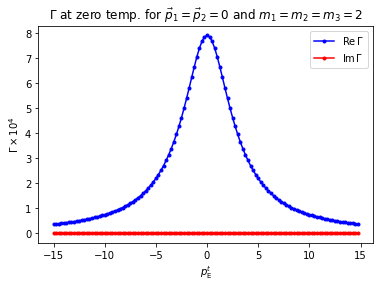

In [17]:
fig, ax = plt.subplots()
ax.plot(pt_eucl_grid_zero_temp, vertex_vals_zero_temp_re * 1e4, label=r"$\mathrm{Re}\,\Gamma$", color="blue", marker=".")
ax.plot(pt_eucl_grid_zero_temp, vertex_vals_zero_temp_im * 1e4, label=r"$\mathrm{Im}\,\Gamma$", color="red", marker=".")
ax.set_xlabel(r"$p^{t}_{\mathrm{E}}$")
ax.set_ylabel(r"$\Gamma\times 10^{4}$")
ax.set_title(r"$\Gamma$ at zero temp. for $\vec{p}_1 = \vec{p}_2 = 0$ and $m_1 = m_2 = m_3 = 2$")
ax.legend(loc="upper right")

## Dimensionless Gamma at finite temperature

### Testing the scaling behaviour

In [18]:
l_grid  = np.arange(-10, 11)
q1 = [0, 0, 0]
q2 = [0, 0, 0]
xis = 1, 1, 1
a = 0.5
n_min = -12
n_max = - n_min + 1

In [14]:
dimensionless_vertex_vals_M1 = [ft.vertex_function_partial_sum(l, q1, l, q2, *xis, a, n_min, n_max, 1) for l in l_grid]
dimensionless_vertex_vals_M2 = [ft.vertex_function_partial_sum(l, q1, l, q2, *xis, a, n_min, n_max, 2) for l in l_grid]
dimensionless_vertex_vals_M3 = [ft.vertex_function_partial_sum(l, q1, l, q2, *xis, a, n_min, n_max, 3) for l in l_grid]

In [15]:
dimensionless_vertex_plotvals_M1 = np.array([sp.re(finite_part(x)) for x in dimensionless_vertex_vals_M1])
dimensionless_vertex_plotvals_M2 = np.array([sp.re(finite_part(x)) for x in dimensionless_vertex_vals_M2])
dimensionless_vertex_plotvals_M3 = np.array([sp.re(finite_part(x)) for x in dimensionless_vertex_vals_M3])

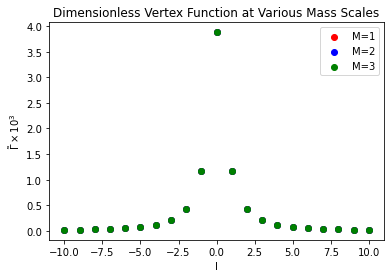

In [16]:
fig, ax = plt.subplots()
ax.scatter(l_grid, dimensionless_vertex_plotvals_M1 * 1e3, label="M=1", color="red")
ax.scatter(l_grid, dimensionless_vertex_plotvals_M2 * 1e3, label="M=2", color="blue")
ax.scatter(l_grid, dimensionless_vertex_plotvals_M3 * 1e3, label="M=3", color="green")
ax.set_xlabel("l")
ax.set_ylabel(r"$\tilde{\Gamma}\times 10^3$")
ax.set_title("Dimensionless Vertex Function at Various Mass Scales")
ax.legend(loc="upper right")

### Plotting the a-dependence

In [19]:
q1 = [0, 0, 0]
q2 = [0, 0, 0]
xis = 1, 1, 1
a_list = [0.1, 0.5, 1, 5, 10]

In [20]:
l_grid  = np.arange(-20, 21)
n_min = -20
n_max = - n_min + 1

In [21]:
# rows = len(a_list)
# cols = len(l_grid)
# dimensionless_Gamma_finite_temp_data = np.zeros(rows * cols).reshape(rows, cols)
# for r in range(rows):
#     for c in range(cols):
#         dimensionless_Gamma_finite_temp_data[r, c] =\
#             re(finite_part(corr.dimensionless_Gamma_finite_temp(l_grid[c], q1, l_grid[c], q2, *xis, a_list[r], n_min, n_max, 1)))

# np.save("dimensionless_Gamma_finite_temp_data", dimensionless_Gamma_finite_temp_data)

dimensionless_Gamma_finite_temp_data = np.load("dimensionless_Gamma_finite_temp_data.npy", allow_pickle=True)

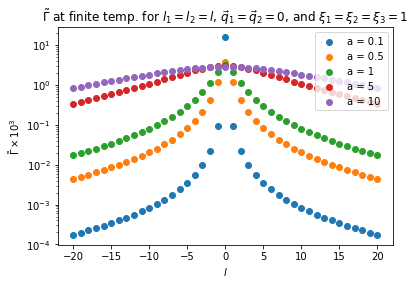

In [22]:
fig, ax = plt.subplots()
for index in range(len(a_list)):
    ax.scatter(l_grid, dimensionless_Gamma_finite_temp_data[index, :] * 1e3, label=f"a = {a_list[index]}")
ax.set_xlabel(r"$l$")
ax.set_ylabel(r"$\tilde{\Gamma}\times 10^3$")
ax.set_yscale("log")
ax.set_title(r"$\tilde{\Gamma}$ at finite temp. for $l_1 = l_2 = l$, $\vec{q}_1 = \vec{q}_2 = 0$, and $\xi_1 = \xi_2 = \xi_3 = 1$")
ax.legend(loc="upper right")

### Dimensionless Gamma at zero temperature

In [8]:
qt_eucl_grid = np.linspace(-15, 15, 60)
dimensionless_Gamma_zero_temp_data =\
    np.array([corr.dimensionless_Gamma_zero_temp([qt_eucl, *q1], [qt_eucl, *q2], *xis, 1) for qt_eucl in qt_eucl_grid])

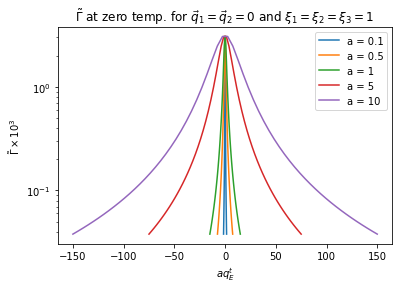

In [16]:
dimensionless_Gamma_zero_temp_plotdata = np.array([re(finite_part(x)) for x in dimensionless_Gamma_zero_temp_data])
fig, ax = plt.subplots()
for a in a_list:
    ax.plot(qt_eucl_grid * a, dimensionless_Gamma_zero_temp_plotdata * 1e3, label=f"a = {a}")
ax.set_xlabel(r"$a q^t_E$")
ax.set_ylabel(r"$\tilde{\Gamma}\times 10^3$")
ax.set_yscale("log")
ax.set_title(r"$\tilde{\Gamma}$ at zero temp. for $\vec{q}_1 = \vec{q}_2 = 0$ and $\xi_1 = \xi_2 = \xi_3 = 1$")
ax.legend(loc="upper right")

### Dimensionless Gamma: combined finite and zero temperature plots

In [23]:
a = 0.1

In [24]:
q1_space = [0, 0, 0]
q2_space = [0, 0, 0]
xi_vals = 1, 1, 1
nmin = -20
nmax = 1 - nmin
M = 1

In [25]:
l_vals = np.arange(1, 11)

In [26]:
dimensionless_vertex_vals_finite_temp =\
    [ft.dimensionless_vertex_function_partial_sum(l, q1_space, l, q2_space, *xi_vals, a, nmin, nmax, M) for l in l_vals]

In [27]:
dimensionless_vertex_vals_finite_temp_plotdata = np.array([sp.re(finite_part(val)) for val in dimensionless_vertex_vals_finite_temp])

In [28]:
qt_eucl_grid = np.linspace(l_vals[0] / a, l_vals[-1] / a, 10)

In [29]:
dimensionless_vertex_vals_zero_temp =\
    [zt.dimensionless_vertex_function([qt_eucl, *q1_space], [qt_eucl, *q2_space], *xi_vals, M) for qt_eucl in qt_eucl_grid]

In [30]:
dimensionless_vertex_vals_zero_temp_plotdata = np.array([sp.re(finite_part(val)) for val in dimensionless_vertex_vals_zero_temp])

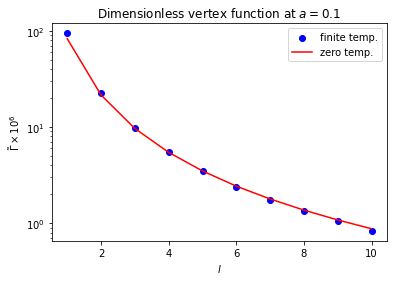

In [31]:
fig, ax = plt.subplots()
ax.scatter(l_vals, dimensionless_vertex_vals_finite_temp_plotdata * 1e6, label="finite temp.", color="blue")
ax.plot(qt_eucl_grid * a, dimensionless_vertex_vals_zero_temp_plotdata * 1e6, label="zero temp.", color="red")
ax.set_xlabel(r"$l$")
ax.set_yscale("log")
ax.set_ylabel(r"$\tilde{\Gamma}\times 10^6$")
ax.set_title(r"Dimensionless vertex function at $a={}$".format(a))
ax.legend(loc="upper right")